In [65]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # Suppresses INFO and WARNING messages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y_ = iris.target.reshape(-1, 1)  # Convert data to a single column

In [67]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_)

In [68]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [69]:
# Build the model
model = Sequential()

model.add(Input(shape=(4,)))  # Add an Input layer
model.add(Dense(10, activation="relu", name="fc1"))
model.add(Dense(10, activation="relu", name="fc2"))
model.add(Dense(3, activation="softmax", name="output"))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

print("Neural Network Model Summary: ")
print(model.summary())

# Train the model
model.fit(X_train, y_train, verbose=2, batch_size=5, epochs=200)

# Test on unseen data
results = model.evaluate(X_test, y_test)

print("Final test set loss: {:4f}".format(results[0]))
print("Final test set accuracy: {:4f}".format(results[1]))

Neural Network Model Summary: 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200


24/24 - 1s - 49ms/step - accuracy: 0.3417 - loss: 2.5365
Epoch 2/200
24/24 - 0s - 4ms/step - accuracy: 0.3417 - loss: 1.8042
Epoch 3/200
24/24 - 0s - 3ms/step - accuracy: 0.2000 - loss: 1.4553
Epoch 4/200
24/24 - 0s - 3ms/step - accuracy: 0.1167 - loss: 1.2439
Epoch 5/200
24/24 - 0s - 2ms/step - accuracy: 0.3000 - loss: 1.0749
Epoch 6/200
24/24 - 0s - 2ms/step - accuracy: 0.4000 - loss: 0.9563
Epoch 7/200
24/24 - 0s - 2ms/step - accuracy: 0.6833 - loss: 0.8800
Epoch 8/200
24/24 - 0s - 2ms/step - accuracy: 0.7000 - loss: 0.8106
Epoch 9/200
24/24 - 0s - 2ms/step - accuracy: 0.7167 - loss: 0.7603
Epoch 10/200
24/24 - 0s - 3ms/step - accuracy: 0.7167 - loss: 0.7150
Epoch 11/200
24/24 - 0s - 3ms/step - accuracy: 0.7167 - loss: 0.6749
Epoch 12/200
24/24 - 0s - 2ms/step - accuracy: 0.7167 - loss: 0.6378
Epoch 13/200
24/24 - 0s - 2ms/step - accuracy: 0.7167 - loss: 0.6011
Epoch 14/200
24/24 - 0s - 2ms/step - accuracy: 0.7167 - loss: 0.5705
Epoch 15/200
24/24 - 0s - 2ms/step - accuracy: 0.7167 

In [70]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)  # Convert predictions to labels
true_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to labels

# # Map the numerical labels back to original class names
predictions = iris.target_names[predictions]
true_labels = iris.target_names[true_labels]

print(classification_report(true_labels, predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



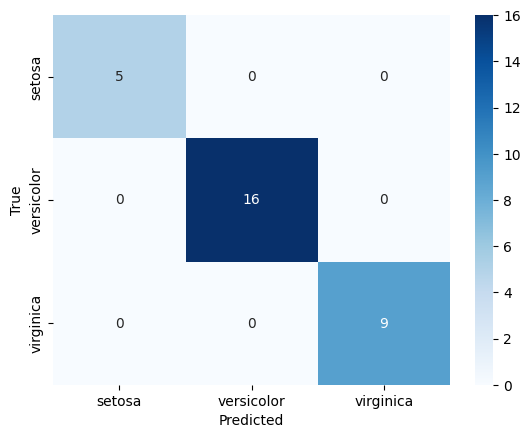

In [71]:
cm = confusion_matrix(true_labels, predictions)

#plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()